In [218]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

In [284]:
rgb_image = imread("tobin.bmp")
rgb_image.shape

(512, 255, 3)

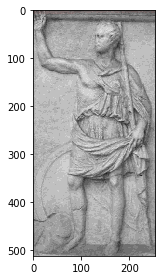

In [285]:
io.imshow(rgb_image)
io.show()

In [286]:
# extract red channel
r_image = rgb_image[:, :, 0]
g_image = rgb_image[:, :, 1]
b_image = rgb_image[:, :, 2]
r_image.shape

(512, 255)

In [287]:
g_image

array([[ 80,  80,  64, ..., 128, 128,   0],
       [ 96,  96,  96, ..., 112, 112,   0],
       [ 96,  96,  96, ...,  96,  96,   0],
       ..., 
       [144, 144, 160, ..., 160, 160,   0],
       [144, 160, 160, ..., 160, 160,   0],
       [160, 160, 160, ..., 144, 144,   0]], dtype=uint8)

In [288]:
r_image

array([[ 95,  90,  67, ..., 139, 136,  15],
       [107, 110,  99, ..., 127, 123,  12],
       [103, 110, 111, ..., 110, 111,  12],
       ..., 
       [144, 144, 160, ..., 160, 160,   0],
       [144, 160, 160, ..., 160, 160,   0],
       [160, 160, 160, ..., 144, 144,   0]], dtype=uint8)

In [289]:
b_image

array([[ 80,  80,  64, ..., 128, 128,   0],
       [ 96,  96,  96, ..., 112, 112,   0],
       [ 96,  96,  96, ...,  96,  96,   0],
       ..., 
       [144, 144, 160, ..., 160, 160,   0],
       [144, 160, 160, ..., 160, 160,   0],
       [160, 160, 160, ..., 144, 144,   0]], dtype=uint8)

In [290]:
diff = r_image - b_image
diff.shape

(512, 255)

In [291]:
diff_8 = diff[:8]
diff_8_shape = diff_8.shape
diff_8

array([[15, 10,  3, ..., 11,  8, 15],
       [11, 14,  3, ..., 15, 11, 12],
       [ 7, 14, 15, ..., 14, 15, 12],
       ..., 
       [ 1, 15, 11, ..., 15,  7, 12],
       [ 7, 14, 15, ..., 14,  3, 14],
       [15,  8, 15, ...,  0,  0,  0]], dtype=uint8)

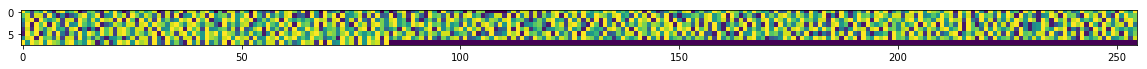

In [292]:
plt.figure(figsize = (20,2))
plt.imshow(diff_8)
plt.show()

In [293]:
# Convert diff_8 to greyscale
diff_8_grey = np.zeros([diff_8_shape[0], diff_8_shape[1], 3])
diff_8_grey[:, :, 0] = diff_8
diff_8_grey[:, :, 1] = 0
diff_8_grey[:, :, 2] = 0
diff_8_grey.shape

(8, 255, 3)

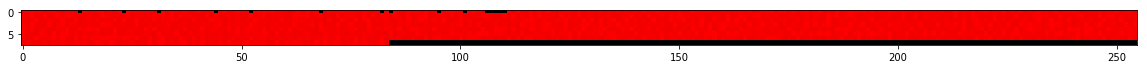

In [294]:
plt.figure(figsize = (20,2))
plt.imshow(diff_8_grey)
plt.show()

In [295]:
# Try just red channel without diff
r_image_8_grey = np.zeros([diff_8_shape[0], diff_8_shape[1], 3])
r_image_8_grey[:, :, 0] = r_image[:8]
r_image_8_grey[:, :, 1] = 0
r_image_8_grey[:, :, 2] = 0
r_image_8_grey.shape

(8, 255, 3)

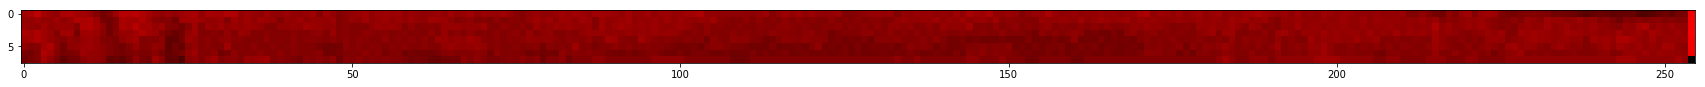

In [296]:
plt.figure(figsize = (30,25))
plt.imshow(r_image_8_grey)
plt.show()

In [297]:
# Convert to binary
binary = []
for im in range(0, 8):
    binary += list(map(lambda x: "{0:b}".format(x).rjust(8, '0'), r_image[im]))
binary

['01011111',
 '01011010',
 '01000011',
 '01011011',
 '01101000',
 '01101111',
 '01010111',
 '01010001',
 '01011101',
 '01011111',
 '01101000',
 '01111011',
 '10001110',
 '10000000',
 '01100011',
 '01001011',
 '01001100',
 '01000101',
 '01010001',
 '01011110',
 '01101000',
 '01101111',
 '01100110',
 '01110000',
 '01100011',
 '01011101',
 '01011000',
 '01101101',
 '01011000',
 '01011011',
 '01011110',
 '01010000',
 '01010010',
 '01101110',
 '01100011',
 '01101011',
 '01101111',
 '01100001',
 '01101110',
 '01101110',
 '01100011',
 '01101101',
 '01101111',
 '01101000',
 '01100000',
 '01111011',
 '01100001',
 '01101110',
 '01111110',
 '01110011',
 '01101101',
 '01101000',
 '01100000',
 '01101111',
 '01100110',
 '01100011',
 '01100110',
 '01100010',
 '01101111',
 '01101000',
 '01101110',
 '01101111',
 '01101100',
 '01100101',
 '01101111',
 '01100001',
 '01101110',
 '01101000',
 '01100000',
 '01101111',
 '01100100',
 '01100111',
 '01101011',
 '01100001',
 '01101011',
 '01111000',
 '01111101',

In [298]:
from functools import reduce
polycebus = list(map(lambda q: len(q), filter(lambda w: w != '', reduce(lambda z, y: z + y, map(lambda x: x[-4:], binary)).split('0'))))
print(set(polycebus))
print(polycebus[:10])

{1, 2, 3, 4, 5, 6}
[5, 1, 3, 3, 4, 3, 3, 6, 1, 5]


In [299]:
from functools import reduce
polybius = list(reduce(lambda z, y: z + y, map(lambda x: x[-4:], binary)).split('000'))
polybius

['1111101',
 '1110111',
 '11110111',
 '1110111111',
 '1011111',
 '',
 '011101111',
 '101',
 '111101',
 '1111011',
 '',
 '01111011',
 '11011',
 '1011111',
 '',
 '010111',
 '1110111111',
 '11110111',
 '11110111111',
 '',
 '01011',
 '11110111',
 '1111011',
 '',
 '01111011',
 '11011',
 '1011111',
 '1110111111',
 '1011111',
 '111101',
 '',
 '0111101',
 '1111011',
 '110111',
 '110111111',
 '110111111',
 '',
 '0101',
 '',
 '01111011111',
 '101',
 '1111101',
 '111101',
 '',
 '01111011',
 '1110111',
 '',
 '01101',
 '1110111',
 '',
 '',
 '',
 '',
 '',
 '',
 '00101111',
 '111110111',
 '10111',
 '10111',
 '111110111111',
 '111110111111',
 '111110111',
 '10111',
 '1111110111111',
 '10111',
 '111110111111',
 '111110111',
 '101',
 '111110111',
 '11111101111',
 '1011111',
 '1011',
 '111111011',
 '1111110111',
 '11111101',
 '111110111',
 '101',
 '11111101',
 '101111',
 '1111110111',
 '111110111',
 '111111011111',
 '1111110111',
 '1011111',
 '1011111',
 '1111110111111',
 '1011111',
 '1011',
 '1111110111

In [300]:
translation_table = [['🔥', '🔥', '🔥', '🔥', '🔥', '🔥', '🔥'],
                     ['🔥', 'a', 'b', 'c', 'd', 'e', 'f'],
                     ['🔥','g', 'h', 'i', 'j', 'k', 'l'],
                     ['🔥', 'm', 'n', 'o', 'p', 'q', 'r'],
                     ['🔥', 's', 't', 'u', 'v', 'w', 'x'],
                     ['🔥', 'y', 'z', '0', '1', '2', '3'],
                     ['🔥', '4', '5', '6', '7', '8', '9']]
translation_table

[['🔥', '🔥', '🔥', '🔥', '🔥', '🔥', '🔥'],
 ['🔥', 'a', 'b', 'c', 'd', 'e', 'f'],
 ['🔥', 'g', 'h', 'i', 'j', 'k', 'l'],
 ['🔥', 'm', 'n', 'o', 'p', 'q', 'r'],
 ['🔥', 's', 't', 'u', 'v', 'w', 'x'],
 ['🔥', 'y', 'z', '0', '1', '2', '3'],
 ['🔥', '4', '5', '6', '7', '8', '9']]

In [301]:
badai = 

SyntaxError: invalid syntax (<ipython-input-301-5ae6ddaa239a>, line 1)

In [302]:
i = 0
SOLUTION = ""
while i < len(polybius) - 1:
    SOLUTION += translation_table[hack[i]][hack[i + 1]]
    i += 2
    
print(SOLUTION)

yourepastthecruxbuttheresstillawaystogod0cc330c9c30a07eb5640a4d6086ee9eb967903eb988b13b6206ca3fd2f5dcdd2edff487aa091ec4effa7dc2ba6d3cb23768a9fecdd8f5ea2954fc4a19607c29a1f42ad47a85e176e0f47d538b89d98e26cc71f588b0ed3c908dae8a9cd04e89032eccf85016f3861818759b454582c433e9470fa5626990a21ac037e86833c914a93f3dda83a5385077dc6e20021c52b06eb4f92e5f91cd4a484f15cf3a1cc836c7887dd422d72ad4a12bb5a22321ae8abddfb6a3e7f98869232383ba7171f58f7f0e6d08bba96cb9f5


In [303]:
i = 0
SOLUTION = ""
for char in polybius:
    if char == '':
        SOLUTION += ' '
    else:
        char_split = list(map(lambda q: len(q), filter(lambda w: w != '',char.split('0'))))
        SOLUTION += translation_table[char_split[0]][char_split[1]]
    
print(SOLUTION)

youre past the crux but theres still a ways to go      d0cc330c9c30a07eb5640a4d6086ee9eb967903eb988b13b6206ca3fd2f5dcdd2edff487aa091ec4effa7dc2ba6d3cb23768a9fecdd8f5ea2954fc4a19607c29a1f42ad47a85e176e0f47d538b89d98e26cc71f588b0ed3c908dae8a9cd04e89032eccf85016f3861818759b454582c433e9470fa5626990a21ac037e86833c914a93f3dda83a5385077dc6e20021c52b06eb4f92e5f91cd4a484f15cf3a1cc836c7887dd422d72ad4a12bb5a22321ae8abddfb6a3e7f98869232383ba7171f58f7f0e6d08bba96cb9f5bf5235282096c4bff99030c2f6b56adeb4b8722e1a4c6f3294a5c1016becb956db89c47e6967659dfe4277d08cadbf0680e687799c1bb8e328e5b14b57c5f55f64aa0f3edc0d812bab36949687950344eddb469a6e7e2968c4fa9758a38e8868b7d12e7d                                                                                                                                                                                                                                    


# HEX BULLSHIT!

In [304]:
bullshit_2 = """89A4367EBC5EC506C144692115E3CEFDD809B05CDCA8D7541768AE1FB381FCEC18EAD4E5D3292DFCDFDA5DE29A4D0A86055098C7F8EEB7DD1F17C80B5A234F6A90B212964CC6A546D8B03E17B8BE9BCB148D37CCCEF5A809D6CE96C8A9947FC83A6BFFC91355C2BF285E41AA0471BBF572A8714BE15359D1E12EF203AA5D71F126EF070CEBB790001245EC5F19402E13875F8DBB1867A689797E0C218C792EFE0084B84895639668E6E31FF1E71A109DCC8BEA86E2A2BCCC501112B4833737B0B74D4F29318AED2E8EB6FD63766A17AEF5F9CCA505F0C5815E9C8D894116230F2977A69587385FDE8C629FBA8046582621D8BC704496BF998F45B5A4B04BD82289DA6BD7857F63F5B469549B4D7D9E3BB46EED75D6AEC6A7477DAB9F00DC5B4D6C29F1C2A06194B6BB2D8E931A3C"""
print(len(bullshit_2))

In [1]:
hex_code = SOLUTION.split('      ')[1]
hex_code

NameError: name 'SOLUTION' is not defined

In [ ]:
print(len(hex_code))
print(len(hex_code) / 2)

In [ ]:
def convert_hex_to_int_list(hex_string, window=1):
    i = 0
    hex_list = []
    while i < len(hex_string):
        hex_list.append(int(hex_string[i: i + window], 16))
        i += window
    return hex_list

def inverse_otp(message, key, mod):
    code = []
    for i, mes in enumerate(message):
        code.append(abs((mes + key[i])) % mod)
    
    return code

def inverse_otp_xor(message, key):
    code = []
    for i, mes in enumerate(message):
        code.append(mes ^ key[i])
    
    return code
        

def to_alphabet(message):
    s = ''
    fucked_up_ascii = string.ascii_lowercase + '0123456789'
    for c in message:
        s += fucked_up_ascii[c]
    print(s)

In [ ]:
# message + key % 26
window = 2
message = convert_hex_to_int_list(hex_code, window=window)
key = convert_hex_to_int_list(bullshit_2, window=window)

In [ ]:
otp_message = inverse_otp(message, key, 16)
# otp_message = inverse_otp(key, message, 16)
otp_message = inverse_otp_xor(message, key)

In [ ]:
n, bins, patches = plt.hist(np.array(otp_message))
plt.grid(True)
plt.show()

In [ ]:
reduce(lambda x, y: x  + y, map(chr, otp_message))